## DataFrames

<p align="center">
<img src="images/class2.png" width="50%" height="50%">
</p>

A **DataFrame** is a two-dimensional, size-mutable, and heterogeneous tabular data structure with labeled axes (rows and columns). It is one of the most commonly used data structures in data analysis and machine learning, especially when dealing with structured data.

### Why are DataFrames important?
- **Structured Representation**: DataFrames provide a structured representation of data, making it easier to observe and analyze.
- **Flexibility**: They can hold different types of data (e.g., integer, string, float) in different columns.
- **Functionality**: Libraries like pandas in Python offer a wide range of functions to manipulate, filter, group, and transform data in DataFrames.
- **Integration with Machine Learning**: DataFrames are often used as input data structures for machine learning models. They can be easily split into training and testing sets, and their columns can be used as features for models.

### Applications in Data Analysis and Machine Learning
1. **Data Cleaning**: Handling missing values, filtering rows or columns, and transforming data.
2. **Data Exploration**: Calculating statistics, visualizing data, and identifying patterns.
3. **Feature Engineering**: Creating new features from existing ones to improve model performance.
4. **Model Training**: Using DataFrames to train machine learning models.

### Business Example
Imagine a retail company that wants to analyze its sales data. The data might include columns like 'Product ID', 'Product Name', 'Category', 'Price', 'Units Sold', and 'Date of Sale'. With a DataFrame, the company can easily:
- Analyze sales trends over time.
- Identify the best-selling products.
- Calculate the total revenue for a specific time period.
- Group sales data by category or product.
- Predict future sales using machine learning models.

## Example 1: Fictitious Data

### Creating a Fictitious Data

In [ ]:
import pandas as pd
import numpy as np

# Creating a fictitious sales data
np.random.seed(42)
data = {
    'Product ID': np.arange(1, 101),
    'Product Name': ['Product_' + str(i) for i in range(1, 101)],
    'Category': np.random.choice(['Electronics', 'Clothing', 'Groceries', 'Household'], 100),
    'Price': np.random.uniform(10, 500, 100).round(2),
    'Units Sold': np.random.randint(1, 100, 100),
    'Date of Sale': pd.date_range(start='2022-01-01', periods=100, freq='D')
}

# Introducing some missing values
for _ in range(10):
    data['Price'][np.random.randint(0, 100)] = np.nan
    data['Units Sold'][np.random.randint(0, 100)] = np.nan

sales_df = pd.DataFrame(data)
sales_df.head()

### Data Cleaning

In [ ]:
# Checking for missing values
missing_values = sales_df.isnull().sum()
missing_values

In [ ]:
# Handling missing values by filling with the mean of the column
sales_df['Price'].fillna(sales_df['Price'].mean(), inplace=True)
sales_df['Units Sold'].fillna(sales_df['Units Sold'].mean(), inplace=True)

# Verifying if there are any missing values left
sales_df.isnull().sum()

### Data Exploration

In [ ]:
# Getting a summary of the data
sales_summary = sales_df.describe()
sales_summary

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the distribution of 'Price'
plt.figure(figsize=(10, 6))
sales_df['Price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.grid(False)
plt.show()

### Feature Engineering

In [ ]:
# Creating a new feature 'Revenue' which is 'Price' multiplied by 'Units Sold'
sales_df['Revenue'] = sales_df['Price'] * sales_df['Units Sold']

# Creating a feature 'Month of Sale' extracted from 'Date of Sale'
sales_df['Month of Sale'] = sales_df['Date of Sale'].dt.month

sales_df[['Product Name', 'Price', 'Units Sold', 'Revenue', 'Month of Sale']].head()

## Example 2: Fortune Data

### Reading a CSV File

In [ ]:
# Importing necessary libraries
import pandas as pd

# Reading a sample CSV file related to business and economy
# For this example, I'll use a dataset about Fortune 500 companies
url = 'https://raw.githubusercontent.com/hizocar/datasets/main/fortune500.csv'
fortune_df = pd.read_csv(url, sep=',', on_bad_lines='skip')

# Displaying the first few rows of the dataset using .head()
fortune_df.head()

### Descripción de las Columnas

- **Year**: Esta columna representa el año en el que se registraron los datos de la empresa. Es de tipo `int64`, lo que significa que contiene valores enteros.

- **Name**: Esta columna contiene el nombre de la empresa. Es de tipo `object`, lo que generalmente indica que contiene cadenas de texto.

- **Revenue**: Esta columna representa los ingresos de la empresa en millones. Es de tipo `float64`, lo que indica que contiene valores decimales.

Cada columna tiene un significado específico y es esencial para el análisis de las empresas Fortune 500 y su rendimiento a lo largo de los años.

In [ ]:
# Checking the data types of each column 
data_types = fortune_df.dtypes
data_types

### Data Cleaning: Transforming the 'Revenue' Column

In [ ]:
# Replacing '-' with 0
fortune_df['Revenue'] = fortune_df['Revenue'].replace('-', '0')

# Removing any remaining non-numeric characters and converting to float
fortune_df['Revenue'] = fortune_df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Checking the data types of each column again
data_types_updated = fortune_df.dtypes
data_types_updated

In [ ]:
# Standardizing column names to lowercase and replacing spaces with underscores
fortune_df.columns = fortune_df.columns.str.lower().str.replace(' ', '_')

# Displaying the updated column names
fortune_df.columns

Index(['year', 'name', 'revenue', 'rank'], dtype='object')

### Data Exploration

In [ ]:
# Checking for missing values in the dataframe
missing_values = fortune_df.isnull().sum()
missing_values

From the initial check for missing values, it appears that there are no missing values in any of the columns of the dataframe. This is great as it means we don't have to perform any imputation or data filling for this dataset.

Next, let's use the `.describe()` method to get a summary of the distribution of the numerical data.

In [ ]:
# Using .describe() to get a summary of the numerical columns
data_summary = fortune_df.describe()
data_summary

The `.describe()` method provides a summary of the numerical columns in the dataframe. Here are some insights from the summary:

- **Year**: The data spans from 1955 to 2021.
- **Revenue**: The average revenue of the companies listed is approximately 8,488.47 million. The minimum revenue is 0 million (which might indicate missing or unreported data for some companies), and the maximum revenue is a staggering 559,151 million. The 25th percentile is 480.45 million, the median (50th percentile) is 2,184.2 million, and the 75th percentile is 7,829.15 million.
- **Rank**: The rank ranges from 1 to 500, which is expected for a list of the top 500 companies.

Next, let's check the shape of the dataframe to understand its dimensions and then explore the unique values in the non-numerical columns.

In [ ]:
# Checking the shape of the dataframe
data_shape = fortune_df.shape

# Checking unique values in the 'name' column
unique_companies = fortune_df['name'].nunique()

data_shape, unique_companies

((33500, 4), 2273)

Here are some additional insights from our exploration:

- The dataframe has **33,500 rows** and **4 columns**. This means we have data for 33,500 entries across the 4 columns.
- The `name` column, which represents the names of the companies, has **2,273 unique values**. This indicates that many companies have appeared on the list multiple times over the years.

Given the size of the dataset and the number of unique companies, there's a wealth of information to explore further, such as trends over time, the distribution of revenues among the top companies, and more.

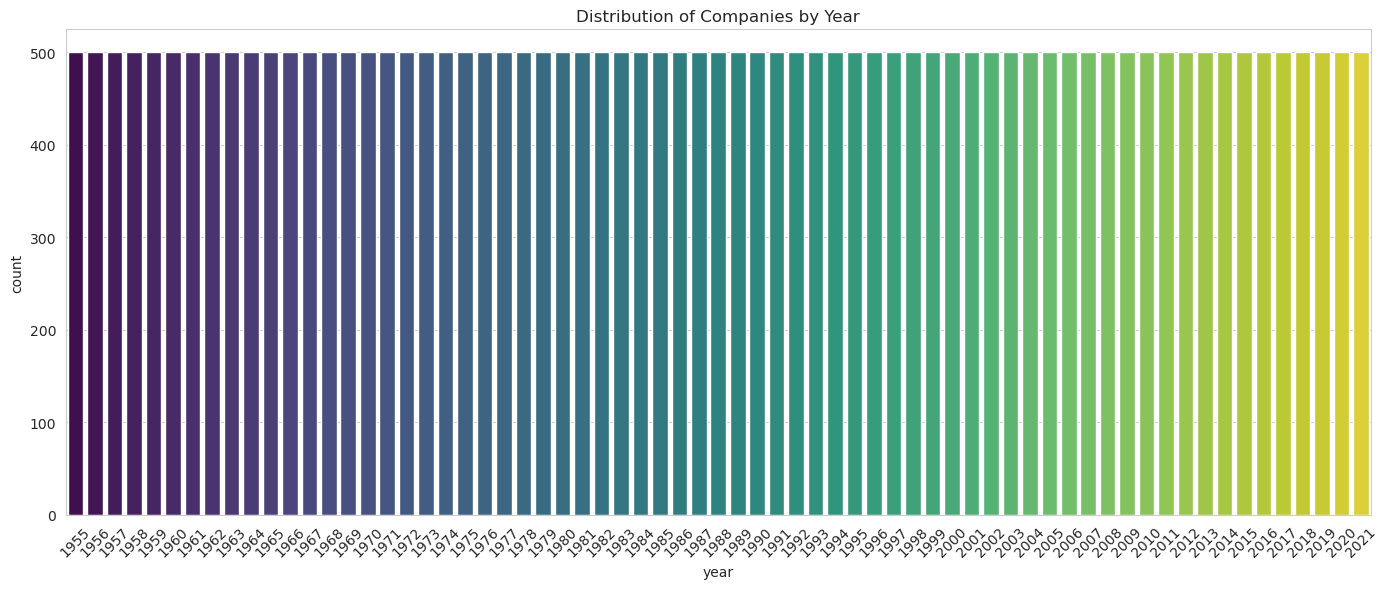

In [ ]:
# Importing necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style for the plots
sns.set_style('whitegrid')

# Plotting the distribution of the 'year' column
plt.figure(figsize=(14, 6))
sns.countplot(x='year', data=fortune_df, palette='viridis')
plt.title('Distribution of Companies by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

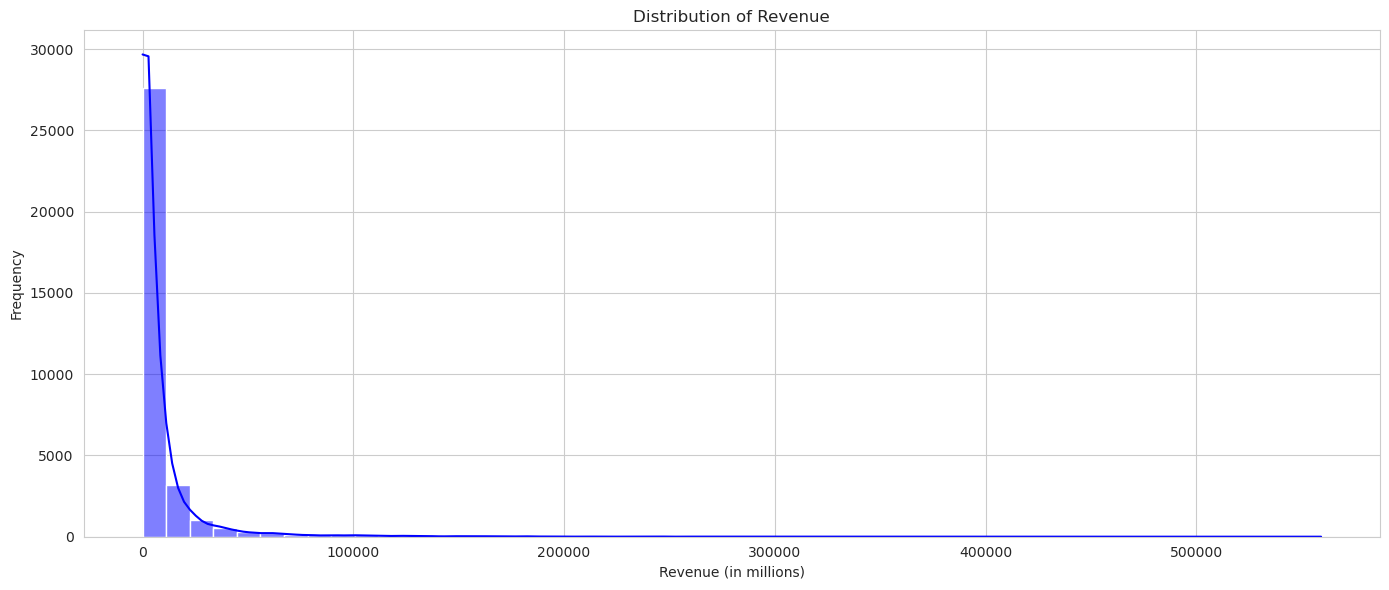

In [ ]:
# Plotting the distribution of the 'revenue' column
plt.figure(figsize=(14, 6))
sns.histplot(fortune_df['revenue'], bins=50, color='blue', kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in millions)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Now, let's explore the relationships between the numerical variables. One of the best ways to visualize relationships between numerical variables is by using a correlation heatmap. This will allow us to see if there are any strong linear relationships between the variables in our dataset.

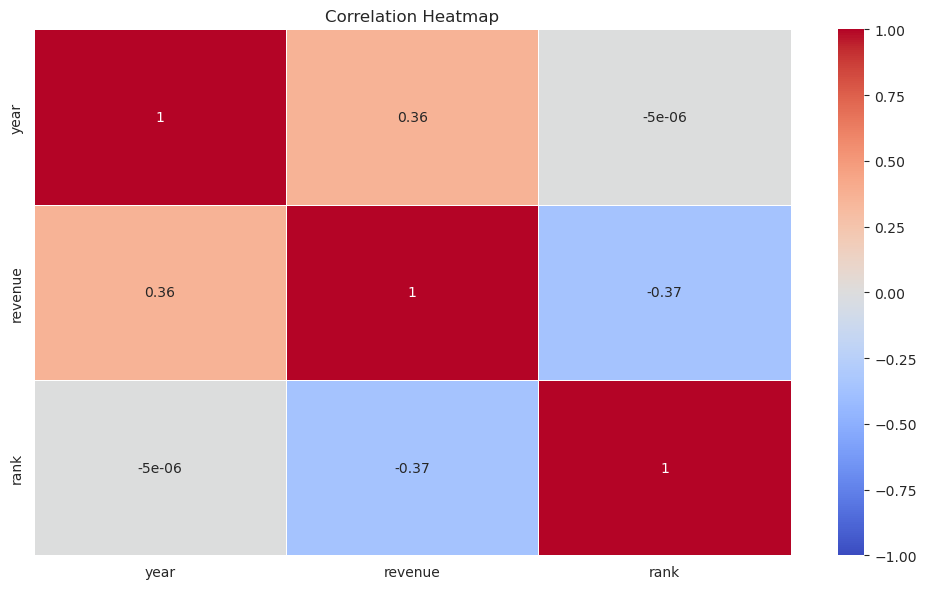

In [ ]:
# Calculating the correlation matrix
correlation_matrix = fortune_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

From the correlation heatmap, we can observe the following:

- **Year and Rank**: There's a negative correlation between the year and the rank. This might indicate that over the years, the ranking criteria or the companies in the list have changed.
- **Revenue and Rank**: There's also a negative correlation between revenue and rank. This is expected since a higher revenue would generally mean a higher rank (or a lower rank number) on the Fortune 500 list.

It's important to note that correlation does not imply causation. While these variables might be correlated, it doesn't mean that one causes the other. The heatmap provides a quick overview of potential relationships that might be worth exploring further.

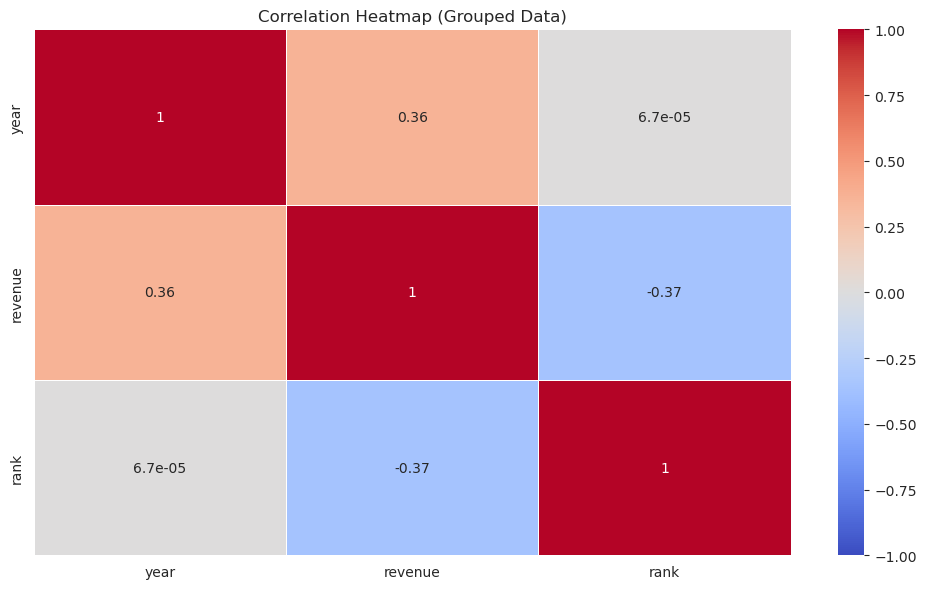

In [ ]:
# Grouping the data by company and year
grouped_data = fortune_df.groupby(['name', 'year']).mean().reset_index()

# Plotting the correlation heatmap for the grouped data
correlation_matrix_grouped = grouped_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Grouped Data)')
plt.tight_layout()
plt.show()

After grouping the data by company and year, the correlation heatmap for the grouped data shows similar insights as before. The negative correlation between `year` and `rank` and between `revenue` and `rank` remains consistent.

Next, let's visualize the revenue evolution over the years for three companies. We'll choose 'Walmart', 'Exxon Mobil', and 'Apple' as our sample companies for this analysis.

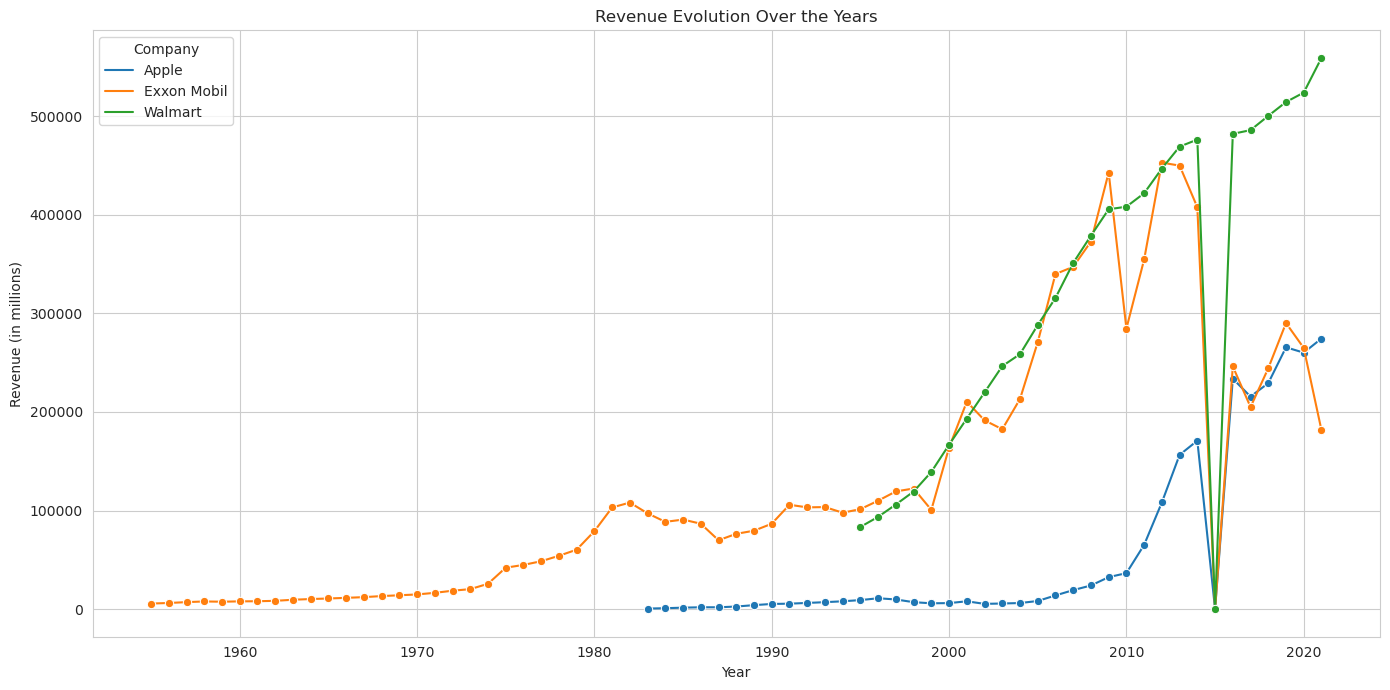

In [ ]:
# Filtering data for the three chosen companies
companies = ['Walmart', 'Exxon Mobil', 'Apple']
filtered_data = grouped_data[grouped_data['name'].isin(companies)]

# Plotting the revenue evolution over the years for the three companies
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='year', y='revenue', hue='name', palette='tab10', marker='o')
plt.title('Revenue Evolution Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.legend(title='Company')
plt.tight_layout()
plt.show()